In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
# Load the dataset from your CSV file
df = pd.read_csv("/Users/shashiroy/Desktop/iris_classification/iris.csv")

# Assuming the CSV does not include species names, you'll need to map them
iris = load_iris()
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# If duplicates are found, print them
if not duplicate_rows.empty:
    print("\nDuplicate rows found:\n", duplicate_rows)

    # Optionally, remove duplicate rows
    df_cleaned = df.drop_duplicates()
    print(f"\nData shape after removing duplicates: {df_cleaned.shape}")
else:
    print("\nNo duplicate rows found in the dataset.")

Number of duplicate rows: 3

Duplicate rows found:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
34             4.9           3.1            1.5           0.1     Iris-setosa   
37             4.9           3.1            1.5           0.1     Iris-setosa   
142            5.8           2.7            5.1           1.9  Iris-virginica   

       species  
34      setosa  
37      setosa  
142  virginica  

Data shape after removing duplicates: (147, 6)


Columns in the dataset:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'species'],
      dtype='object')

First 5 rows of the dataset:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Statistical summary of the dataset:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066    

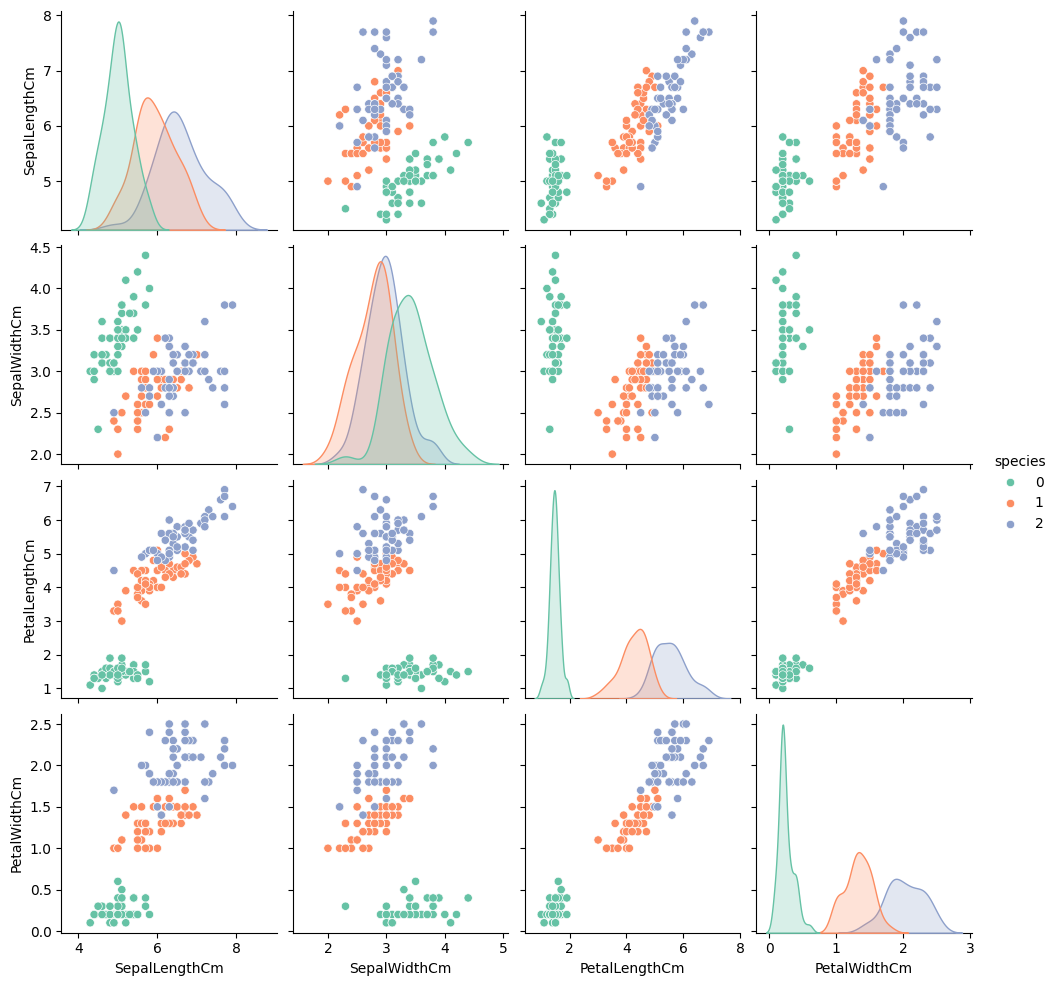

In [37]:
# Explore the dataset
print("Columns in the dataset:\n", df.columns)
print("\nFirst 5 rows of the dataset:\n", df.head())
df['species'] = iris.target
print("\nStatistical summary of the dataset:\n", df.describe())
sns.pairplot(df, hue='species', palette='Set2')
plt.show()

In [38]:
# Step 4: Define X as the feature set (excluding the species column)
X = df.drop('species', axis=1)

# Step 5: Check for missing values
print("Missing values in each column before filling:\n", X.isnull().sum())  # Print count of missing values in each column
if X.isnull().any().any():
    numeric_columns = X.select_dtypes(include=['number']).columns
    X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())  # Fill missing values with column mean
    print("Data types of features after filling missing values:\n", X.dtypes)
else:
    print("No missing values found in the dataset.")

Missing values in each column before filling:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
No missing values found in the dataset.


In [39]:
#Split the data into training and testing sets
X = df
y = iris.target
print("Data types:\n",X.dtypes)
print("missing values:\n", X.isnull().sum())
X = df.drop('species', axis=1)
y = df['species']
print("Target variable before encoding:\n",y)
numeric_columns = X.select_dtypes(include=['number']).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns.tolist())
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Shape of X before split:", X.shape)
print("Shape of y before split:", y_encoded.shape)
print(X.dtypes)
X_numeric = X.select_dtypes(include=['number'])
if X_numeric.shape[1] != X.shape[1]:
    print("Non-numeric columns detected:", X.columns[~X.columns.isin(X_numeric.columns)].tolist())
print(X.isnull().sum())
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Data types:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
species            int64
dtype: object
missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species          0
dtype: int64
Target variable before encoding:
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64
Non-numeric columns detected: ['Species']
Shape of X before split: (150, 5)
Shape of y before split: (150,)
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Non-numeric columns detected: ['Species']
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
X_train shape: (120, 5)
y_train shape: (120,)


In [40]:
# Standardize the features
scaler = StandardScaler()
X_train_numeric = X_train.select_dtypes(include=['number'])
scaler.fit(X_train_numeric)
scaler.fit(X_numeric)
X_train_scaled = scaler.transform(X_train_numeric)
X_test_numeric = X_test.select_dtypes(include=['number'])
X_test_scaled = scaler.transform(X_test_numeric)
print("Scaled Training Data:\n", X_train_scaled[:5])
print("X-train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Scaled Training Data:
 [[-1.50652052  1.26346019 -1.56873522 -1.31297673]
 [-0.17367395  3.11468391 -1.2844067  -1.05003079]
 [ 1.03800476  0.10644536  0.36469871  0.26469891]
 [-1.26418478  0.80065426 -1.227541   -1.31297673]
 [-1.74885626  0.33784833 -1.39813811 -1.31297673]]
X-train shape: (120, 5)
y_train shape: (120,)


In [41]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Classification report
print("\nClassification Report")
print(classification_report(y_test, y_pred))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 1.00

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



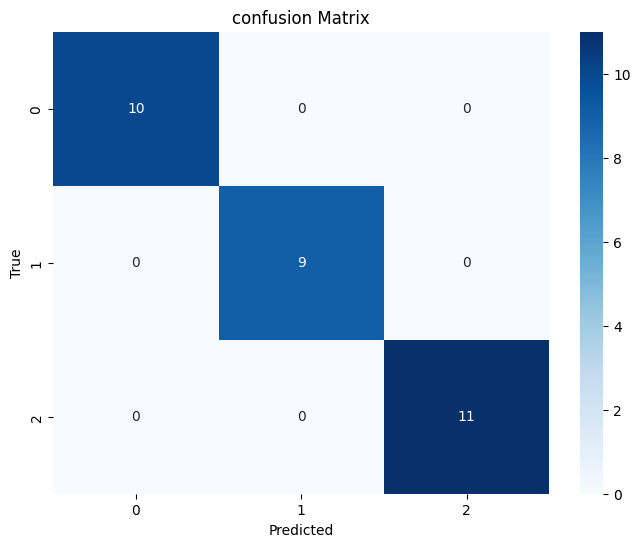

In [44]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion Matrix')
plt.show()